# 引入套件

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np

# matplotlib 基本操作
https://matplotlib.org/stable/api/pyplot_summary.html

![picture](https://drive.google.com/uc?id=1aKy-l5XibB6AfK5C0Qe6TcXCR2jzpwJ9)

## 1. 折線圖
x軸:數值；y軸:數值

很常會畫上不只一條折線圖

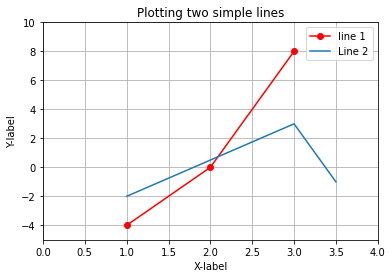

In [ ]:
# 先做出 X 軸跟 Y 軸的資料
x = [1, 2, 3]
y = [-4, 0, 8]
x2 = [1, 3, 3.5]
y2 = [-2, 3, -1]

# plt.plot 把 X 軸跟 Y 軸的資料給函數，就能畫折線圖
#plt.plot(x, y, label='Line 1')
plt.plot(x, y, 'ro-', label='line 1')
#plt.plot(y=y,x=x, label='Line 1') #不能這樣


plt.plot(x2, y2, label='Line 2')

# plt.title 能改 figure 的標題
plt.title("Plotting two simple lines")

# plt.grid 能設定要不要網格
plt.grid(True)

# plt.xlabel 跟 plt.ylabel 能設定 X 軸和 Y 軸的名稱
plt.xlabel("X-label")
plt.ylabel("Y-label")

# plt.xlim 跟 plt.ylim 能設定 X 軸和 Y 軸的數值範圍
plt.xlim([0, 4])
plt.ylim([-5, 10])

# plt.legend 能設定要不要顯示圖例
plt.legend()

# 最後用 plt.show 就能把圖畫出來 
plt.show()

## 2.散佈圖
x軸:數值；y軸:數值

*常會利用顏色區分不同種類散佈點
- 不同職業上，年資與薪水的關係

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=17dfYDn1FD7y0Tbhkk8IymASemy6BuRNv'
output = 'Salary_data.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17dfYDn1FD7y0Tbhkk8IymASemy6BuRNv
To: /content/Salary_data.csv
100%|██████████| 454/454 [00:00<00:00, 230kB/s]


'Salary_data.csv'

In [ ]:
# 讀取薪水資料集
data = pd.read_csv("Salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


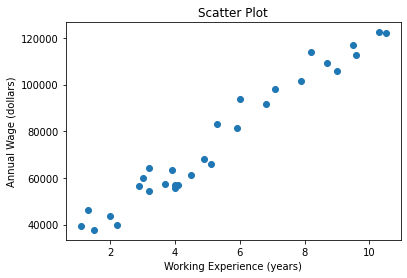

In [ ]:
# 先準備 X 軸跟 Y 軸的資料
X = data["YearsExperience"]
Y = data["Salary"]

# plt.scatter 把 X 軸跟 Y 軸的資料給他，就能畫散佈圖
plt.scatter(X, Y)

plt.title("Scatter Plot")
plt.xlabel("Working Experience (years)")
plt.ylabel("Annual Wage (dollars)")
plt.show()

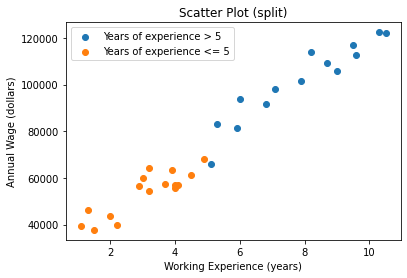

In [ ]:
# 數值型的資料可以考慮分區段來觀察分佈狀況
X_1 = X[X > 5]
Y_1 = Y[X > 5]
X_2 = X[X <= 5]
Y_2 = Y[X <= 5]

plt.scatter(X_1, Y_1, label='Years of experience > 5')
plt.scatter(X_2, Y_2, label='Years of experience <= 5')
plt.title("Scatter Plot (split)")
plt.legend()
plt.xlabel("Working Experience (years)")
plt.ylabel("Annual Wage (dollars)")
plt.show()

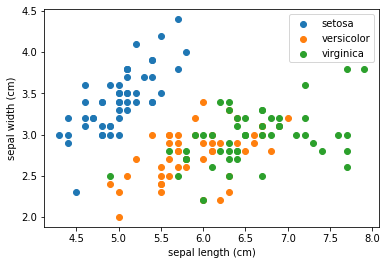

In [ ]:
# 分類問題的資料集也很適合用這種方式來觀察分佈狀況
iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target
n_classes = 3
for i in range(n_classes):
    plt.scatter(X_iris[Y_iris == i, 0], X_iris[Y_iris == i, 1],  
    label=iris.target_names[i])
plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Iris dataset 是一個古典的花朵資料集，由英國統計學家 Ronald Fisher 爵士在1936年時，對加斯帕半島上的鳶尾屬花朵所提取的花瓣花萼的長寬數據資料，依照山鳶尾，變色鳶尾，維吉尼亞鳶尾三類進行標示，共150筆資料。Iris dataset 中包含四種特徵 (Features) 與三種花卉標籤 (Labels)

Features
- Sepal length: 花萼長度 (cm)
- Sepal width: 花萼寬度 (cm)
- Petal length: 花瓣長度 (cm)
- Petal width: 花瓣寬度 (cm)

Labels
- setosa: 山鳶尾 label=0
- versicolor: 變色鳶尾 label=1
- virginica: 維吉尼亞鳶尾 label=2

No handles with labels found to put in legend.


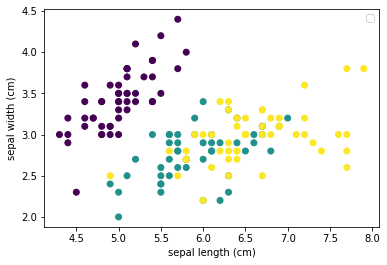

In [ ]:
plt.scatter(x=X_iris[:,0], y=X_iris[:,1], c=Y_iris)
plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## 3.長條圖
x軸:類別；y軸:數值

常會利用顏色區分不同群體

In [ ]:
# 長條圖可以用來看多個類別的狀況，這邊來看一下 Setosa 這種花的各個 feature 的平均值
iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target
average = X_iris[Y_iris == 0].mean(axis=0)
average

array([5.006, 3.428, 1.462, 0.246])

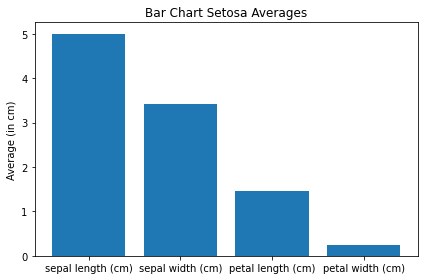

In [ ]:
# plt.bar 把 X 軸跟 Y 軸的資料給他，就能畫長條圖，注意 X 軸會是多個不連續的數值或類別
plt.bar(iris.feature_names, average)
plt.title("Bar Chart Setosa Averages")
plt.ylabel("Average (in cm)")

# plt.tight_layout 防止圖裡的字疊在一起
plt.tight_layout()
plt.show()

In [ ]:
# 我們也可以一次看三種花的各個特徵的平均值，比較一下每種花是不是有某種傾向，不過這樣做圖會需要比較複雜一點的程式碼
n_classes = 3
averages = []
for i in range(n_classes):
    averages.append(X_iris[Y_iris == i].mean(axis=0))
averages

[array([5.006, 3.428, 1.462, 0.246]),
 array([5.936, 2.77 , 4.26 , 1.326]),
 array([6.588, 2.974, 5.552, 2.026])]

[0 1 2 3]


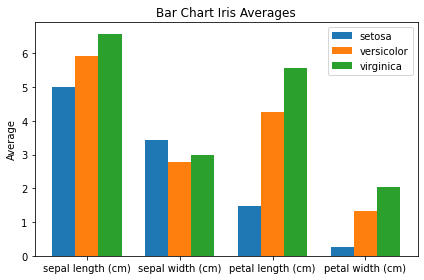

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

x = np.arange(len(iris.feature_names))
print(x)

bar1 = ax.bar(x - 0.25, averages[0], 0.25, label=iris.target_names[0])
bar2 = ax.bar(x    , averages[1], 0.25, label=iris.target_names[1])
bar3 = ax.bar(x + 0.25, averages[2], 0.25, label=iris.target_names[2])
ax.set_xticks(x)
ax.set_xticklabels(iris.feature_names)

plt.legend()
plt.title("Bar Chart Iris Averages")
plt.ylabel("Average")
plt.tight_layout()
plt.show()

## 4.直方圖
x軸:數值；y軸:數值(次數)

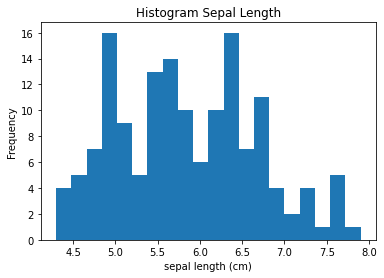

In [ ]:
# 直方圖可以用來看連續數值的狀況，這邊來看一下所有花的花萼長度的分佈狀況
iris = datasets.load_iris()
X_iris = iris.data
X_sepal = X_iris[:, 0]

# plt.hist 把某個 feature 的所有數值(X_sepal)跟要切成幾個區段(bins)給他，就能畫直方圖
# 預設bins=10
plt.hist(X_iris[:,0], bins = 20)
plt.title("Histogram Sepal Length")
plt.xlabel(iris.feature_names[0])
plt.ylabel("Frequency")
plt.show()

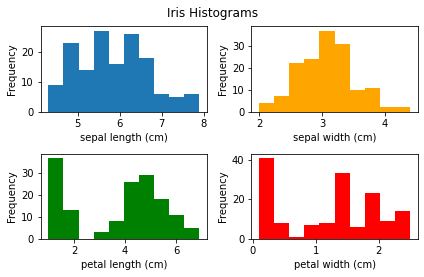

In [ ]:
# plt.subplots 可以畫多張子圖，第一個參數指定要幾個 row，第二個參數指定要幾個 column
fig, axs = plt.subplots(nrows=2, ncols=2)

# axs[row, column] 可以指定要畫在哪一張子圖上
axs[0, 0].hist(X_iris[:, 0])
axs[0, 1].hist(X_iris[:, 1], color='orange')
axs[1, 0].hist(X_iris[:, 2], color='green')
axs[1, 1].hist(X_iris[:, 3], color='red')

i = 0
for row in range(2):
    for column in range(2):
        axs[row, column].set(xlabel=iris.feature_names[i], ylabel='Frequency')
        i += 1

# 要做一個這些子圖共用的標題要用 fig.suptitle
# 如果是要個別的子圖都有一個 title 要用 axs[row, column].title 來做
fig.suptitle("Iris Histograms")

# tight_layout 可以設定作圖的範圍 [x_1, y_1, x_2, y_2]，橫向會從 x_1 做到 x_2，縱向從 y_1 做到 y_2
# 這裡要特別設置是為了防止標題跟圖疊在一起 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 5.箱形圖
使用時機:檢視數值變項的分佈範圍、集中狀態。特別顯示四個等分點的位置
- 花萼長度分佈
- 國人的月薪分佈

x軸:-；y軸:數值

![picture](https://drive.google.com/uc?id=1aEGL1jfeZ-M5QCSHLVdq4Cm4MWSSBGdE)

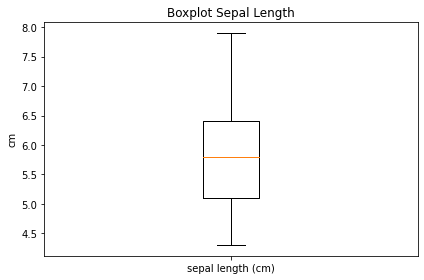

In [ ]:
iris = datasets.load_iris()
X_iris = iris.data
X_sepal = X_iris[:, 0]

# boxplot 把某個 feature 的數值(X_sepal)給他，就能畫箱型圖
plt.boxplot(X_sepal, labels=[iris.feature_names[0]])
plt.title("Boxplot Sepal Length")
plt.ylabel("cm")
plt.tight_layout()
plt.show()

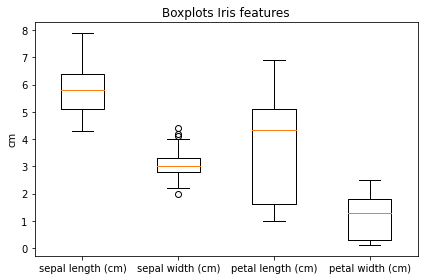

In [ ]:
# boxplot 也可以直接把多個 feature 的數值給他，就會在一張圖上畫出各個 feature 的箱型圖
plt.boxplot(X_iris, labels=[iris.feature_names[0], iris.feature_names[1], iris.feature_names[2], iris.feature_names[3]])
plt.title("Boxplots Iris features")
plt.ylabel("cm")
plt.tight_layout()
plt.show()